# Trabalho da disciplina Projeto/MVP em Análise de Dados e Boas Práticas

## Aluno: Luis Eduardo Ribeiro Veiga - RA: 40520223000855

## Notebook apresentando as fases: Definição do problema; Coleta e análise de dados; e Pré-processamento de um projeto de ciência de dados.

**Descrição do Problema** - Criar um notebook apresentando as fases de definição do problema, coleta e análise de dados, e pré-processamento do dataset 'California_Housing_Dataset'.

**Dataset** - O dataset inclui características de casas e estatísticas do censo do estado da Califórnia (EUA) de 1990.

O dataset é composto de 20640 instâncias e 8 atributos.

Link para acessar o dataset - https://www.kaggle.com/code/olanrewajurasheed/california-housing-dataset

O dataset também está disponível na biblioteca scikit-learn.

### Importação de bibliotecas

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_california_housing

### Funções utilitárias

### Carga e preparação dos dados

Carrega o arquivo zip a partir da url, descompacta o arquivo e cria o dataset.

In [2]:
# Carga do dataset
california_housing = fetch_california_housing(as_frame=True)

Apresenta informações sobre o dataset.

In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Separa os dados do dataset em treino e teste.

In [5]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:36]
y = array[:,36]

**Seleção de atributos**

É utilizada a técnica de 'Seleção Univariada' para selecionar as variáveis que tenham maior relação com a variável de saída (target).

A rotina seleciona o melhor K e daí seleciona os atributos que correspondam a esse número.

In [6]:
# Seleção de atributos usando Seleção Univariada

# Calculando o melhor k
f1_score_list = []

model_LR = LogisticRegression(max_iter=200)

for k in range(1, 37):
    # Seleção de atributos com SelectKBest
    kbest_var = SelectKBest(score_func=f_classif, k=k)

    # Executa a função de pontuação e obtém os atributos selecionados
    kbest_var.fit(X, y)

    # Reduz X para os atributos selecionados
    features = kbest_var.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

    model_LR.fit(X_train, y_train)
    kbest_pred = model_LR.predict(X_test)    

    f1_score_kbest = round(f1_score(y_test, kbest_pred, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)

# O melhor k selecionado
kbest = f1_score_list.index(max(f1_score_list)) + 1

# Seleção de atributos com o melhor k
kbest_var = SelectKBest(score_func=f_classif, k=kbest)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = kbest_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", dataset.columns[0:36])

# Exibe as pontuações de cada atributo e os escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3) 
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", kbest_var.get_feature_names_out(input_features=dataset.columns[0:36]))

X = features


Número original de atributos: 36

Número reduzido de atributos: 13

Atributos Originais: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem 

### Criação de Pipelines

Define os folds para a validação cruzada. Serão utilizadas 10 partições em sua configuração.

In [7]:
# Criando os folds para a validação cruzada
num_splits = 10
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)

Configuração e avaliação dos modelos.

KNN: 0.704117 (0.028161)
CART: 0.677641 (0.015503)
NB: 0.717349 (0.033303)
SVM: 0.726404 (0.024232)
LR: 0.760966 (0.031134)
Bagging: 0.751280 (0.021899)
RF: 0.757410 (0.024318)
ET: 0.745458 (0.022584)
Ada: 0.748685 (0.027233)
GB: 0.765153 (0.026484)
Voting: 0.751599 (0.026791)


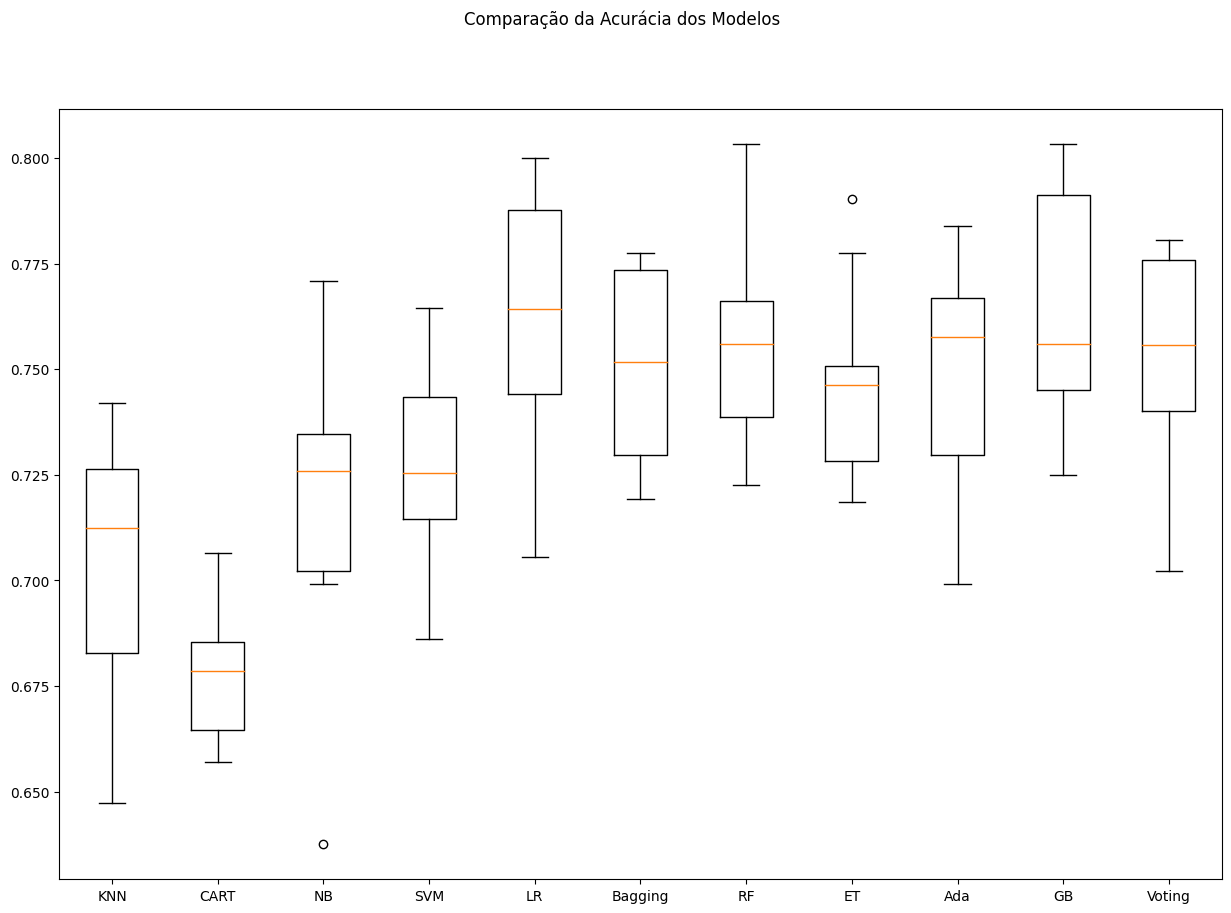

In [8]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(42)

# Divindindo o dataset em subconjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

# Listas para aramazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression(max_iter=200)))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('Logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Criando os elementos do Pipeline. Definição de algoritmos e transformações que serão utilizadas.

In [9]:
# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

Configuração e avaliação dos Pipelines.

LR-orig: 0.760966 (0.031134)
RF-orig: 0.761289 (0.026021)
GB-orig: 0.764830 (0.026588)
LR-padr: 0.760643 (0.028780)
RF-padr: 0.755805 (0.018721)
GB-padr: 0.765476 (0.026218)
LR-norm: 0.749655 (0.028323)
RF-norm: 0.757408 (0.025316)
GB-norm: 0.764830 (0.026588)


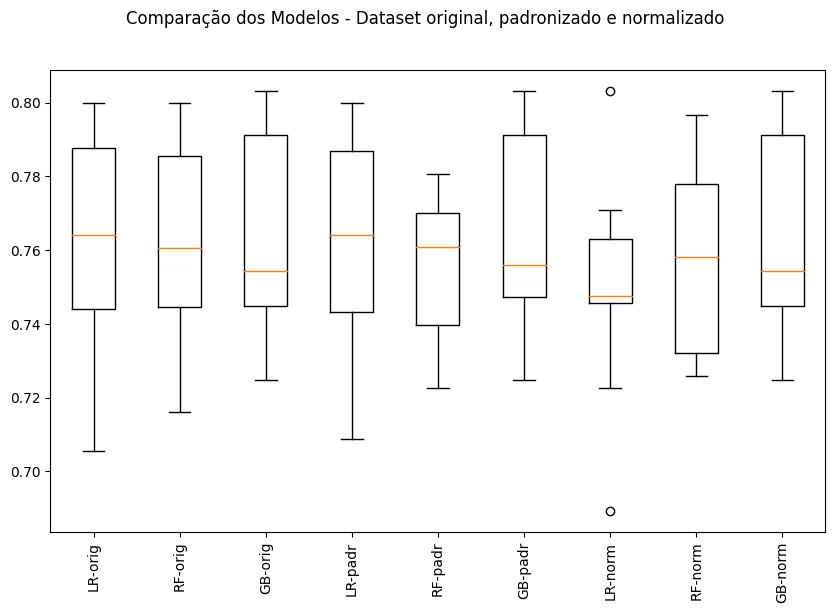

In [10]:
# Montando os pipelines

# Lista para armazenar os pipelines
pipelines = []

# Listas para aramazenar os resultados e os nomes dos modelos
results = []
names = []

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))

# Dataset padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))

# Dataset normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de modelos selecionados
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização de Hiperparâmetros

Baseado no resultado da acurácia da execução dos Pipelines, foram selecionados os algoritmos de Regressão Logistica, Random Forest e Gradient Boosting, para a aplicação de hiperparâmetros a fim de encontrar o melhor modelo.

In [11]:
# tuning da Regressão Logistica

pipelines_reg_log = []

# definindo os componentes do pipeline
pipelines_reg_log.append(('LR-orig', Pipeline(steps=[reg_log])))
pipelines_reg_log.append(('LR-padr', Pipeline(steps=[standard_scaler, reg_log])))
pipelines_reg_log.append(('LR-norm', Pipeline(steps=[min_max_scaler, reg_log])))

param_grid= {
    'LR__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'LR__C' : np.logspace(-4, 4, 20),
    'LR__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'LR__max_iter' : [100, 1000,2500, 5000]
}

# prepara e executa o GridSearchCV
for name, model in pipelines_reg_log:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: LR-orig - Melhor: 0.766139 usando {'LR__C': 4.281332398719396, 'LR__max_iter': 100, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
Sem tratamento de missings: LR-padr - Melhor: 0.763232 usando {'LR__C': 0.615848211066026, 'LR__max_iter': 100, 'LR__penalty': 'l1', 'LR__solver': 'saga'}
Sem tratamento de missings: LR-norm - Melhor: 0.762906 usando {'LR__C': 0.0001, 'LR__max_iter': 100, 'LR__penalty': 'none', 'LR__solver': 'lbfgs'}


In [12]:
# Tuning do Random Forest

pipelines_random_forest = []

# Definindo os componentes do pipeline
pipelines_random_forest.append(('RF-orig', Pipeline(steps=[random_forest])))
pipelines_random_forest.append(('RF-padr', Pipeline(steps=[standard_scaler, random_forest])))
pipelines_random_forest.append(('RF-norm', Pipeline(steps=[min_max_scaler, random_forest])))

param_grid = [{
    'RF__n_estimators':[10,100,200],
    'RF__max_features':[1,3],
}]

# prepara e executa o GridSearchCV
for name, model in pipelines_random_forest:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: RF-orig - Melhor: 0.760644 usando {'RF__max_features': 3, 'RF__n_estimators': 200}
Sem tratamento de missings: RF-padr - Melhor: 0.760318 usando {'RF__max_features': 3, 'RF__n_estimators': 200}
Sem tratamento de missings: RF-norm - Melhor: 0.759999 usando {'RF__max_features': 1, 'RF__n_estimators': 200}


In [13]:
# Tuning do Gradient Boosting

pipelines_gradient_boosting = []

# Definindo os componentes do pipeline
pipelines_gradient_boosting.append(('GB-orig', Pipeline(steps=[gradient_boosting])))
pipelines_gradient_boosting.append(('GB-padr', Pipeline(steps=[standard_scaler, gradient_boosting])))
pipelines_gradient_boosting.append(('GB-norm', Pipeline(steps=[min_max_scaler, gradient_boosting])))

param_grid = [{
    'GB__n_estimators':[10,100,200],
    'GB__max_features':[1,3],
}]

# prepara e executa o GridSearchCV
for name, model in pipelines_gradient_boosting:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: GB-orig - Melhor: 0.763865 usando {'GB__max_features': 3, 'GB__n_estimators': 100}
Sem tratamento de missings: GB-padr - Melhor: 0.762258 usando {'GB__max_features': 1, 'GB__n_estimators': 200}
Sem tratamento de missings: GB-norm - Melhor: 0.765804 usando {'GB__max_features': 1, 'GB__n_estimators': 200}


Execução do modelo com a melhor configuração de hiperparâmetros e dados de teste.

In [23]:
# avaliação do modelo com o conjunto de testes

# preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

reg_log = ('LR', LogisticRegression(max_iter=100, C=4.281332398719396, penalty='l2', solver='lbfgs'))
model = Pipeline([reg_log])

model.fit(rescaledX, y_train)

# estimativa da acurácia no conjunto de teste
rescaledTextX = scaler.transform(X_test)
predictions = model.predict(rescaledTextX)
print(accuracy_score(y_test, predictions))

0.7703313253012049


### Teste do modelo com todo o dataset

Preparação do modelo.

In [24]:
# preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model.fit(rescaledX, y)

Pipeline(steps=[('LR', LogisticRegression(C=4.281332398719396))])

Teste do modelo com classe de saída não informada.

In [25]:
# novos dados - não sabemos a classe
data = {
"Application mode": [17],
"Debtor": [0],
"Tuition fees up to date": [1],
"Gender": [1],
"Scholarship holder": [0],
"Age at enrollment": [20],
"Curricular units 1st sem (enrolled)": [0],
"Curricular units 1st sem (evaluations)": [0],
"Curricular units 1st sem (approved)": [0],
"Curricular units 1st sem (grade)": [0.0],
"Curricular units 2nd sem (enrolled)": [0],
"Curricular units 2nd sem (evaluations)": [0],
"Curricular units 2nd sem (approved)": [0],
"Curricular units 2nd sem (grade)": [0.0],
}

atributos = ["Application mode","Debtor","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment","Curricular units 1st sem (enrolled)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:13].astype(float)

# padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.095 -0.358  0.368  1.358 -0.575 -0.43  -2.529 -1.521 -2.197 -2.838
  -2.043 -1.472 -1.963]]


Predição com os dados informados.

In [26]:
# predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

['Dropout']


### Sumário

Na preparação do modelo para uso na classificação do dataset, foi feita uma operação de seleção de atributos. Do dataset inicial de 36 atributos, a operação de seleção reduziu esse conjunto para 13 atributos, essa redução permitiu um desempenho melhor na execução do algoritmo de classificação. Na busca do melhor modelo, foi utilizada cross-validation e a criação de pipelines de modelos. A otimização de hiperparâmetros implementada evidenciou que o algoritmo de Regressão Logistica apresentou o melhor resultado considerando a acurácia. Os hiperparâmetros levantados foram ('LR__C': 4.281332398719396, 'LR__max_iter': 100, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'). Com eles a acurácia obtida foi de 0.7703313253012049. 